# Project: Wrangling and Analyze Data



In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import requests
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
#helper function 
def savefig(name):
    plt.savefig(f'{name}.png', dpi=500, bbox_inches="tight")

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
enhanced_twitter_archive = pd.read_csv('./twitter-archive-enhanced.csv')

In [4]:
enhanced_twitter_archive.tail(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# Use requests library to download file
image_prediction_link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_prediction_link)
response

<Response [200]>

In [6]:
# save file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Read the tab seperated value file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

image_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
new_data = []

# open tweet json file
with open('./tweet-json.txt', 'r') as file:
    #return all the lines in the tweet-json file
    tweets = file.readlines()
    #loop over all tweets
    for tweet in tweets:
        #parse the json (convert each tweet to a dictionary)
        parsed_tweet = json.loads(tweet)
        #extract each tweet's id then retweet and favorite counts 
        new_data.append({'tweet_id': parsed_tweet['id'],
                              'retweet_count': parsed_tweet['retweet_count'],
                              'favorite_count': parsed_tweet['favorite_count']})

tweet_json = pd.DataFrame(new_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_json.sample(5)

,tweet_id,retweet_count,favorite_count
1622,684880619965411328,936,2305
1851,675706639471788032,106,693
1103,734912297295085568,572,2993
2099,670691627984359425,266,632
2171,669324657376567296,223,525


## Assessing Data


Completeness, validity, accuracy and consistency issues are going to be assessed in this section

## Enhanced Twitter Archive table

In [8]:
enhanced_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
enhanced_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1949,673689733134946305,NaN,NaN,2015-12-07 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a blast and remember tomorr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673689733...,11,10,None,None,None,None,None
163,860276583193509888,NaN,NaN,2017-05-04 23:34:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jordy. He likes to go on adventures an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860276583...,12,10,Jordy,None,None,None,None
245,845812042753855489,NaN,NaN,2017-03-26 01:38:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate polar bears but this one...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845812042...,13,10,None,None,None,None,None
1586,686760001961103360,NaN,NaN,2016-01-12 04:01:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper forgot how to walk. 12/10 happens ...,NaN,NaN,NaN,https://vine.co/v/iMvubwT260D,12,10,None,None,None,pupper,None
1517,690938899477221376,NaN,NaN,2016-01-23 16:47:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","She thought the sunset was pretty, but I thoug...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/690938899...,10,10,None,None,None,None,None


In [10]:
enhanced_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
enhanced_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
enhanced_twitter_archive[enhanced_twitter_archive['expanded_urls'].isnull()].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None


In [13]:
enhanced_twitter_archive[enhanced_twitter_archive['expanded_urls'].notnull() 
                        & enhanced_twitter_archive['in_reply_to_status_id'].notnull()].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None


In [14]:
enhanced_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
enhanced_twitter_archive[enhanced_twitter_archive['rating_denominator'] == 170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [16]:
enhanced_twitter_archive[enhanced_twitter_archive['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [17]:
enhanced_twitter_archive[enhanced_twitter_archive['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [18]:
enhanced_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [19]:
enhanced_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [20]:
enhanced_twitter_archive[enhanced_twitter_archive.rating_numerator == 420]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


some of the exoberant ratings are from replies and do not represent actual ratings, eg 24/7 which is hours in day/week.


In [21]:
enhanced_twitter_archive.duplicated().sum()

0

In [22]:
enhanced_twitter_archive.tweet_id.duplicated().sum()

0

---
## Image prediction dataset

In [23]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1713,818614493328580609,https://pbs.twimg.com/media/C1xNgraVIAA3EVb.jpg,4,Chihuahua,0.450722,True,Border_terrier,0.204177,True,beagle,0.092774,True
1557,793226087023144960,https://pbs.twimg.com/media/CwIa5CjW8AErZgL.jpg,1,wire-haired_fox_terrier,0.456047,True,Lakeland_terrier,0.273428,True,English_springer,0.083643,True
1378,764259802650378240,https://pbs.twimg.com/media/CpsyNtXWgAAqvs3.jpg,1,German_shepherd,0.973677,True,malinois,0.025950,True,kelpie,0.000192,True
1208,742385895052087300,https://pbs.twimg.com/media/Ck18CFcXIAAUWoy.jpg,1,Cardigan,0.566911,True,Border_collie,0.117566,True,Appenzeller,0.047664,True
998,708469915515297792,https://pbs.twimg.com/media/CdT9n7mW0AQcpZU.jpg,1,Chihuahua,0.748163,True,toy_terrier,0.127717,True,Pembroke,0.042141,True


In [25]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
image_prediction.duplicated().sum()

0

In [28]:
image_prediction.tweet_id.duplicated().sum()

0

In [29]:
image_prediction.jpg_url.duplicated().sum()

66

In [30]:
duplicated_jpgs = image_prediction[image_prediction.jpg_url.duplicated()]

In [31]:
image_prediction[image_prediction.jpg_url == 'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


---
## Tweet json dataset

In [32]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [33]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [34]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [35]:
tweet_json.duplicated().sum()

0

In [36]:
tweet_json.tweet_id.duplicated().sum()

0

In [37]:
tweet_json.retweet_count.duplicated().sum()

630

In [38]:
tweet_json[tweet_json.retweet_count.duplicated() & tweet_json.favorite_count.duplicated()]

,tweet_id,retweet_count,favorite_count
444,819227688460238848,7733,25652
487,813944609378369540,3732,0
715,783821107061198850,2269,8209
740,780496263422808064,4319,0
812,771102124360998913,1663,6898
...,...,...,...
2307,666804364988780544,95,250
2316,666454714377183233,223,545
2322,666421158376562688,118,327
2328,666362758909284353,595,804


In [39]:
tweet_json[tweet_json.retweet_count == 7733]

,tweet_id,retweet_count,favorite_count
430,820837357901512704,7733,0
444,819227688460238848,7733,25652


### Quality issues

#### Enhanced_twitter_archive table
1. Remove replies and retweeted tweets

2. Missing values (expanded_urls)

3. Timestamp is the wrong datatype

4. Inaccurate ratings for rating demnominator (max = 170, min = 0)

5. Inaccurate ratings numerator (max= 1776 and min=0)

6. Remove irrelevant information from source of tweet

#### Image_prediction and Enhanced_twitter_archive table


7. Inconsistent naming convention for dogs and inconsitent dog types (p1,p2,p3) (some are capitalized, others are not)


#### Image_prediction_table

8. duplicate jpg images 

9. Extract the most confident predictions and dog types

10. Remove Erroneous dog predictions and dog types

---

### Tidiness issues
1. tweet_json and image_prediction should be part of enhanced_twiter_archive table

2. dog classification should be one column

## Cleaning Data
In this section, **all** of the issues you documented while assessing will be cleaned. 

In [40]:
# Make copies of original pieces of data
tweet_json_clean = tweet_json.copy()
enhanced_twitter_archive_clean = enhanced_twitter_archive.copy()
image_prediction_clean = image_prediction.copy()

In [41]:
print(tweet_json_clean.shape, enhanced_twitter_archive_clean.shape, image_prediction_clean.shape)

(2354, 3) (2356, 17) (2075, 12)


## Quality Issues

### Issue #1: enhanced_twitter_archive table

### Remove replies and retweeted tweetes

#### Define
find and delete rows that correspond to replies and retweeted tweets.<br>
drop the columns representing replies and retweeted tweets: <br> <em>('in_reply_to_status_id',
'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp')</em>

#### Code

In [42]:
enhanced_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<b>retweets and replies correspond to 181 and 78 rows respectively.</b>

In [43]:
# Create a list of the column names with 181 non-null values or less
columns_to_drop = [col for col in enhanced_twitter_archive_clean.columns if enhanced_twitter_archive_clean[col].count() <= 181]

columns_to_drop

['in_reply_to_status_id',
 'in_reply_to_user_id',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp']

In [44]:
# Create a boolean mask that indicates which rows match the values in the columns with only 181 non-null values or less
mask = enhanced_twitter_archive_clean[columns_to_drop].notnull().any(axis=1)

# Delete the rows that match the values
enhanced_twitter_archive_clean = enhanced_twitter_archive_clean[~mask]

# Drop the columns
enhanced_twitter_archive_clean = enhanced_twitter_archive_clean.drop(columns=columns_to_drop)

#reset dataframe index
enhanced_twitter_archive_clean.reset_index(inplace=True, drop=True)

#### Test

In [45]:
## check that columns non-null counts do not exceed 2097 (i.e. 2356 -181-78)
enhanced_twitter_archive_clean.shape

(2097, 12)

In [46]:
#check to see that the dropped columns no longer exist
enhanced_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 196.7+ KB


### Issue #2: enhanced_twitter_archive table

### Missing values(expanded_urls )

#### Define
fill expanded_urls missing rows with https://twitter.com/dog_rates/status/{tweet_id}

In [47]:
#function to check if string is nan
import math

def is_nan(string):
    try:
        return math.isnan(float(string))
    except ValueError:
        return False

In [48]:
#identify the rows with nan values for expanded urls
enhanced_twitter_archive_clean[enhanced_twitter_archive_clean.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
295,828361771580813312,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,12,10,None,None,None,None,None
538,785515384317313025,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,10,10,None,None,None,None,None
1222,696518437233913856,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,None,None,pupper,None


In [49]:
#check if expanded_url is nan then fill missing rows with provided link 
for i in range(0,len(enhanced_twitter_archive_clean)):
    if is_nan(enhanced_twitter_archive_clean.expanded_urls[i]):
        tweet_id = enhanced_twitter_archive_clean.tweet_id[i]
        enhanced_twitter_archive_clean.expanded_urls[i] = f"https://twitter.com/dog_rates/status/{tweet_id}"

#### Test

In [50]:
# check that expanded_url non-null count was properly filled. Expanded_urls is the fourth column 
print(enhanced_twitter_archive_clean.iloc[295,4])
print(enhanced_twitter_archive_clean.iloc[538,4])
print(enhanced_twitter_archive_clean.iloc[1222,4])

https://twitter.com/dog_rates/status/828361771580813312
https://twitter.com/dog_rates/status/785515384317313025
https://twitter.com/dog_rates/status/696518437233913856


### Issue #3: enhanced_twitter_archive table
### Time stamp is the wrong format and  datatype

#### Define:
remove +0000 from the end of the timestamp column and change the datatype to timestamp

#### Code

In [51]:
enhanced_twitter_archive_clean.timestamp = enhanced_twitter_archive_clean.timestamp.apply(lambda x: x[:-6])

In [52]:
enhanced_twitter_archive_clean.timestamp = pd.to_datetime(enhanced_twitter_archive_clean.timestamp)

#### Test

In [53]:
enhanced_twitter_archive_clean.timestamp[1]

Timestamp('2017-08-01 00:17:27')

In [54]:
enhanced_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2097 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 196.7+ KB


### Issue #4: enhanced_twitter_archive table
### Inaccurate ratings for rating demnominator (max = 170, min = 0)

#### Define:
detect faulty rows with denominator not equal to 10.<br>
Extract the text of the faulty rows to check the correct rating if it exists<br>
Replace the correct rows and drop rows with no rating

#### Code

In [55]:
enhanced_twitter_archive_clean.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [56]:
#detect faulty rows
affected_cols = enhanced_twitter_archive_clean.query('rating_denominator !=10')[[
    'tweet_id','text','rating_denominator','rating_numerator'
]]
affected_cols.head(1)

,tweet_id,text,rating_denominator,rating_numerator
339,820690176645140481,The floofs have been released I repeat the flo...,70,84


In [57]:
#extract the index of affected columns
affected_index = list(affected_cols.index)

In [58]:
# list full text to see ratings 
text_content = []
for i, item in enumerate(affected_index):
    text_content.append(affected_cols.at[affected_index[i],'text'])
    
text_content[0]

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

In [59]:
#extract ratings with xx/10 
affected_cols['rating'] = affected_cols.text.str.extract('(\d+\/10)')
affected_cols.head()

,tweet_id,text,rating_denominator,rating_numerator,rating
339,820690176645140481,The floofs have been released I repeat the flo...,70,84,NaN
403,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,7,24,NaN
700,758467244762497024,Why does this never happen at my front door......,150,165,NaN
853,740373189193256964,"After so many requests, this is Bretagne. She ...",11,9,14/10
904,731156023742988288,Say hello to this unbelievably well behaved sq...,170,204,NaN


In [60]:
#set the rating_numerator and rating_denominator using rating values
affected_cols[['rating_numerator', 'rating_denominator']] = affected_cols['rating'].str.split('/', expand=True)

In [61]:
id_list = list(set(affected_cols['tweet_id']) & set(enhanced_twitter_archive_clean['tweet_id']))

In [62]:
#fix the rating numerator and denonimator in ehhanced_twitter_archive table 

enhanced_twitter_archive_clean.loc[enhanced_twitter_archive_clean['tweet_id'].isin(id_list),
                                   ['rating_numerator', 'rating_denominator']] = affected_cols.loc[affected_cols['tweet_id'].isin(id_list),
                                                                                ['rating_numerator', 'rating_denominator']]

In [63]:
# remove denominators with NaN
enhanced_twitter_archive_clean = enhanced_twitter_archive_clean[
    ~enhanced_twitter_archive_clean.rating_denominator.isnull()
]

In [64]:
#make sure rating numerator and denominator are integers
enhanced_twitter_archive_clean['rating_denominator'] = enhanced_twitter_archive_clean[
    'rating_denominator'].astype(int)

enhanced_twitter_archive_clean['rating_numerator'] = enhanced_twitter_archive_clean[
    'rating_numerator'].astype(int)

#### Test

In [65]:
#confirm changes to rows with wrong rating_denominator
enhanced_twitter_archive_clean.loc[enhanced_twitter_archive_clean['tweet_id'].isin(id_list),
                                   ['rating_numerator', 'rating_denominator']].head()

,rating_numerator,rating_denominator
853,14,10
948,13,10
985,11,10
1426,10,10
2076,9,10


In [66]:
#confirm value counts
enhanced_twitter_archive_clean.rating_denominator.value_counts()

10    2085
Name: rating_denominator, dtype: int64

### Issue #5: enhanced_twitter_archive table
### Potentially Inaccurate ratings for rating numerator (ratings > 20)

#### Define:
detect faulty rows with unusual numerators.<br>
Extract the text of the faulty rows to check the correct rating if it exists<br>
Replace the correct rows and drop rows with no rating

#### Code

In [67]:
#detect faulty rows
enhanced_twitter_archive_clean.rating_numerator.value_counts()

12      486
10      437
11      414
13      288
9       153
8        98
7        51
14       39
5        34
6        32
3        19
4        15
2         9
1         4
27        1
75        1
0         1
1776      1
26        1
420       1
Name: rating_numerator, dtype: int64

In [68]:
#detect faulty rows
affected_rows = enhanced_twitter_archive_clean.query('rating_numerator > 20')[[
    'tweet_id','text','rating_denominator','rating_numerator'
]]
affected_rows

,tweet_id,text,rating_denominator,rating_numerator
528,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",10,75
586,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,10,27
770,749981277374128128,This is Atticus. He's quite simply America af....,10,1776
1474,680494726643068929,Here we have uncovered an entire battalion of ...,10,26
1821,670842764863651840,After so many requests... here you go.\n\nGood...,10,420


In [69]:
#extract the index of affected columns
affected_index = list(affected_rows.index)

In [70]:
# list full text to see ratings 
text_content = []
for i, item in enumerate(affected_index):
    text_content.append(affected_rows.at[affected_index[i],'text'])
    
text_content

["This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD',
 'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY']

---

#### Task
1. first and last ratings are not ratings of actual dogs and will be dropped. 
2. the ratings with decimals can be rounded off to the nearest whole number 

In [71]:
affected_rows.head()

,tweet_id,text,rating_denominator,rating_numerator
528,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",10,75
586,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,10,27
770,749981277374128128,This is Atticus. He's quite simply America af....,10,1776
1474,680494726643068929,Here we have uncovered an entire battalion of ...,10,26
1821,670842764863651840,After so many requests... here you go.\n\nGood...,10,420


In [72]:
#fix ratings with decimals 
enhanced_twitter_archive_clean.loc[340,'rating_numerator'] = 10 #9.75 initial rating
enhanced_twitter_archive_clean.loc[695,'rating_numerator'] = 10 #9.75 initial rating
enhanced_twitter_archive_clean.loc[763,'rating_numerator'] = 11 #11.27 inital rating
enhanced_twitter_archive_clean.loc[1712,'rating_numerator'] = 11 #11.27 intial rating 

In [73]:
# drop the two non dog ratings
enhanced_twitter_archive_clean = enhanced_twitter_archive_clean[enhanced_twitter_archive_clean.tweet_id != 855862651834028034]
enhanced_twitter_archive_clean = enhanced_twitter_archive_clean[enhanced_twitter_archive_clean.tweet_id != 670842764863651840]

#### Test

In [74]:
#confirm ratings with decimals have been fixed 
enhanced_twitter_archive_clean.loc[[340,695,763,1712], 'rating_numerator']

340     10
695     10
763     11
1712    11
Name: rating_numerator, dtype: int32

In [75]:
# confirm non dog ratings have been dropped
enhanced_twitter_archive_clean[enhanced_twitter_archive_clean.tweet_id == 855862651834028034]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [76]:
enhanced_twitter_archive_clean[enhanced_twitter_archive_clean.tweet_id == 670842764863651840]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #6: (enhanced_twitter_archive) -  remove irrelavant information from source of tweet

#### Define
using regular expressions return only the needed information on tweet source

#### Code

In [77]:
import re

def extract_text(text):
    #needed information is between ''>'and '<' 
    pattern = re.compile(r'>(.*)<')
    result = re.search(pattern, text)
    return result.group(1)

enhanced_twitter_archive_clean.source = enhanced_twitter_archive_clean['source'].apply(extract_text)


#### Test

In [78]:
#confirm that only the needed information is present in 'source'
enhanced_twitter_archive_clean.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2092    Twitter for iPhone
2093    Twitter for iPhone
2094    Twitter for iPhone
2095    Twitter for iPhone
2096    Twitter for iPhone
Name: source, Length: 2084, dtype: object

### Issue #7: (enhanced_twitter_archive and image_prediction tables) -  Inconsistent naming for dogs 

#### Define 
Make all dogs name capitalized in the ehanced_twitter_archive_table<br>
Make the dog type capitalized in image_prediction table

#### Code

In [79]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [80]:
#enhanced_twitter_archive
enhanced_twitter_archive_clean['name'] = enhanced_twitter_archive_clean['name'].str.capitalize()

In [81]:
#image_prediction
columns = ['p1', 'p2', 'p3']
image_prediction_clean[columns] = image_prediction_clean[columns].apply(lambda x: x.str.capitalize())

#### Test

In [82]:
enhanced_twitter_archive_clean.sample(10).name

1323      None
656       Tove
38        None
1647    Sophie
1609     Lenny
2029         A
812     Gustav
298       Kona
154       None
674      Bruce
Name: name, dtype: object

### Issue #8: (image_prediction table) -  duplicated jpgs

#### Define
Remove rows with duplicate jpgs

#### Code

In [83]:
image_prediction = image_prediction_clean.drop_duplicates(subset='jpg_url', keep=False)

#### Test

In [84]:
image_prediction[image_prediction.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #9: (image_prediction) - extract the most confident prediction and dog type into seperate columns

#### Define

create a function that extracts the most confident prediction and dog type<br>
drop irrelevant columns from the image_prediction column


#### Code

In [85]:
def get_dog_breed_and_confidence(image_prediction_clean):
    dog_type = None
    confidence = None
    if image_prediction_clean['p1_dog'] == True:
        dog_type = image_prediction_clean['p1']
        confidence = image_prediction_clean['p1_conf']
    elif image_prediction_clean['p2_dog'] == True:
        dog_type = image_prediction_clean['p2']
        confidence = image_prediction_clean['p2_conf']
    elif image_prediction_clean['p3_dog'] == True:
        dog_type = image_prediction_clean['p3']
        confidence = image_prediction_clean['p3_conf']
    else:
        dog_type = 'Error'
        confidence = 'Error'
    return pd.Series({'dog_type': dog_type, 'confidence': confidence})

image_prediction_clean[['dog_breed', 'confidence']] = image_prediction_clean.apply(get_dog_breed_and_confidence, axis=1)


In [86]:
# drop columns that are no longer needed
image_prediction_clean = image_prediction_clean[['tweet_id','jpg_url','dog_breed','confidence']]

#### Test

In [87]:
#confirm that irrelevant columns have been dropped
image_prediction_clean.head()

,tweet_id,jpg_url,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311


### Issue #10: (image_prediction) - remove erroroneus values from dog_type and confidence

#### Define

Locate and remove rows where dog_type has a value of "error"<br>


#### Code

In [88]:
image_prediction_clean[(image_prediction_clean.dog_breed == "Error") & (image_prediction_clean.confidence == "Error")]

,tweet_id,jpg_url,dog_breed,confidence
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,Error,Error
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,Error,Error
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,Error,Error
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,Error,Error
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,Error,Error
...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,Error,Error
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,Error,Error
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,Error,Error
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,Error,Error


In [89]:
image_prediction_clean = image_prediction_clean[~((image_prediction_clean.dog_breed == "Error") & (image_prediction_clean.confidence == "Error"))]

#### Test

In [90]:
## confirm that erroneus dog_type and confidence has been dropped
image_prediction_clean[(image_prediction_clean.dog_breed == "Error") & (image_prediction_clean.confidence == "Error")]

,tweet_id,jpg_url,dog_breed,confidence


----

## Tidiness Issues

### Issue #1: enhanced_twitter_archive
### dog classifications (doggo, floofer, pupper, puppo) should be in one column

#### Define

Create in a new column and place doggo, floofer, pupper and puppo in the column<br>
Delete the previous four columns


#### Code 

In [91]:
enhanced_twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [92]:
enhanced_twitter_archive_clean = pd.melt(enhanced_twitter_archive_clean, 
                                id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'class', 
                                value_name = 'dog_classification')

In [93]:
# delete the class column  
enhanced_twitter_archive_clean = enhanced_twitter_archive_clean.drop('class', axis=1)

In [94]:
# Sort by dog_stage and drop duplicates
enhanced_twitter_archive_clean = enhanced_twitter_archive_clean.sort_values('dog_classification').drop_duplicates(subset='tweet_id', keep='last')

#### Test

In [95]:
enhanced_twitter_archive_clean.dog_classification.value_counts()

None       1748
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_classification, dtype: int64

### Issue #2: enhanced_twitter_archive, tweet_json and image_prediction should be one table

#### Define
Merge the twitter_json and image_prediction tables with the enhanced_twitter_archive table using the tweet_id

#### Code

In [96]:
twitter_archive_master =  pd.merge(pd.merge(enhanced_twitter_archive_clean, image_prediction_clean, on='tweet_id'),
                           tweet_json_clean, on='tweet_id')

#### Test

In [97]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_classification,jpg_url,dog_breed,confidence,retweet_count,favorite_count
0,667393430834667520,2015-11-19 17:26:08,Twitter for iPhone,This is Fwed. He is a Canadian Asian Taylormad...,https://twitter.com/dog_rates/status/667393430...,8,10,Fwed,None,https://pbs.twimg.com/media/CUMOyd3XIAAl13H.jpg,Papillon,0.557009,60,211
1,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,None,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint_bernard,0.381377,234,489
2,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091,89,326
3,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.82567,96,327
4,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376,66,203


In [98]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1655 entries, 0 to 1654
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1655 non-null   int64         
 1   timestamp           1655 non-null   datetime64[ns]
 2   source              1655 non-null   object        
 3   text                1655 non-null   object        
 4   expanded_urls       1655 non-null   object        
 5   rating_numerator    1655 non-null   int32         
 6   rating_denominator  1655 non-null   int32         
 7   name                1655 non-null   object        
 8   dog_classification  1655 non-null   object        
 9   jpg_url             1655 non-null   object        
 10  dog_breed           1655 non-null   object        
 11  confidence          1655 non-null   object        
 12  retweet_count       1655 non-null   int64         
 13  favorite_count      1655 non-null   int64       

##### Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [99]:
#Store the clean DataFrame in a CSV file
twitter_archive_master.to_csv('twitter_archive_master.csv', 
                 index=False)

---

## Analyzing and Visualizing Data

In [100]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_classification,jpg_url,dog_breed,confidence,retweet_count,favorite_count
0,667393430834667520,2015-11-19 17:26:08,Twitter for iPhone,This is Fwed. He is a Canadian Asian Taylormad...,https://twitter.com/dog_rates/status/667393430...,8,10,Fwed,None,https://pbs.twimg.com/media/CUMOyd3XIAAl13H.jpg,Papillon,0.557009,60,211
1,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,None,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint_bernard,0.381377,234,489
2,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091,89,326
3,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.82567,96,327
4,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376,66,203


### Dog stages

The goal is to examine which dog stage is represented the most 

In [101]:
twitter_archive_master.dog_classification.value_counts()

None       1398
pupper      173
doggo        54
puppo        22
floofer       8
Name: dog_classification, dtype: int64

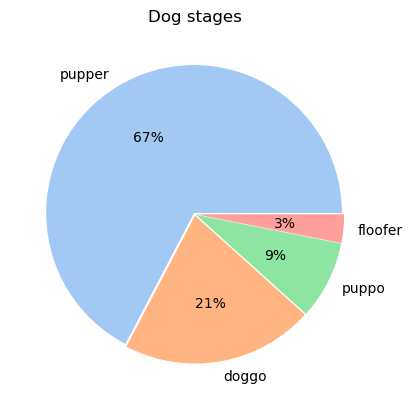

In [102]:
# Create a bar chart from the source column
dog_class = twitter_archive_master['dog_classification'].value_counts().sort_values(ascending=False)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart excluding None
plt.pie(dog_class.values[1:], labels=dog_class.index[1:], colors=palette_color,
         explode=[0.01]*4, autopct='%.0f%%')

#pie chart title
plt.title("Dog stages")
  
#save image
savefig('Dog_stages')
# displaying chart
plt.show()


#### Observation

Puppers are the most dogs accounted for while 
Floofers are the least 

---

### Dog stage with the highest number of retweets and favorites

In [103]:
#add a new column which is the sum of retweets and favorites
twitter_archive_master['total_interaction'] = twitter_archive_master.retweet_count + twitter_archive_master.favorite_count

In [104]:
#remove dog stage 'None' for this analysis

retweets_favorites = twitter_archive_master[twitter_archive_master.dog_classification != "None"]

In [105]:
# Group the data by dog_classification and calculate the mean of total_interaction
mean_interactions = retweets_favorites.groupby('dog_classification')['total_interaction'].mean()
mean_interactions = mean_interactions.sort_values(ascending=False)
mean_interactions

dog_classification
puppo      29615.681818
doggo      26464.111111
floofer    18478.125000
pupper     10368.786127
Name: total_interaction, dtype: float64

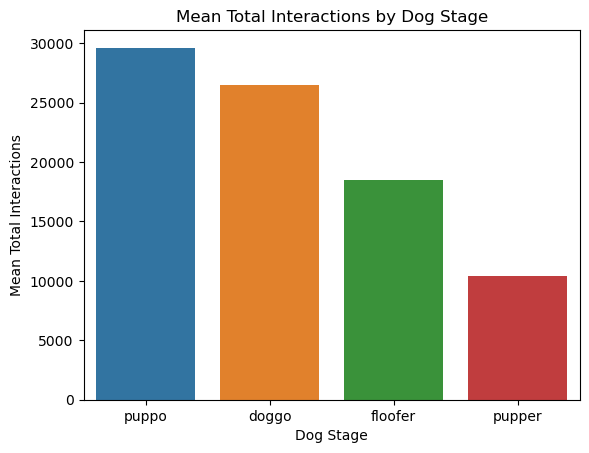

In [106]:
# Create a count plot
sns.barplot(x=mean_interactions.index, y=mean_interactions.values)
plt.xlabel('Dog Stage')
plt.ylabel('Mean Total Interactions')
plt.title('Mean Total Interactions by Dog Stage')
savefig('dog_stage_total_interactions')
plt.show()

#### Observations

1. Puppos averaged the most interactions (likes + retweets)<br>
2. puppers averaged the least interactions.

---

## Dog breeds

In [107]:
twitter_archive_master.dog_breed.value_counts()

Golden_retriever      154
Labrador_retriever    103
Pembroke               94
Chihuahua              90
Pug                    62
                     ... 
Irish_wolfhound         1
Standard_schnauzer      1
Entlebucher             1
Japanese_spaniel        1
Clumber                 1
Name: dog_breed, Length: 113, dtype: int64

#### Observations

The golden retriever is the most represented dog in the we rate dog archive

### Dog breed with the highest number of retweets and favorites

In [108]:
## retrieve dog types with a minimum of 50 tweets
dogs_count = twitter_archive_master.dog_breed.value_counts()
selected_dogs = dogs_count[dogs_count.values > 50]
selected_dogs

Golden_retriever      154
Labrador_retriever    103
Pembroke               94
Chihuahua              90
Pug                    62
Name: dog_breed, dtype: int64

In [109]:
## select rows matching selected dogs
selected_dogs = list(selected_dogs.index)

selected_dogs = twitter_archive_master[twitter_archive_master.dog_breed.isin(selected_dogs)]
selected_dogs.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_classification,jpg_url,dog_breed,confidence,retweet_count,favorite_count,total_interaction
3,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.82567,96,327,423
7,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,None,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957,294,565,859


In [110]:
# Group the twitter_archive master by dog_classification and calculate the mean of total_interaction
interactions = selected_dogs.groupby('dog_breed')['total_interaction'].mean()
interactions = interactions.sort_values(ascending=False)
interactions

dog_breed
Golden_retriever      16356.922078
Labrador_retriever    16050.650485
Pembroke              14154.978723
Chihuahua             11049.011111
Pug                    8104.822581
Name: total_interaction, dtype: float64

In [111]:
####

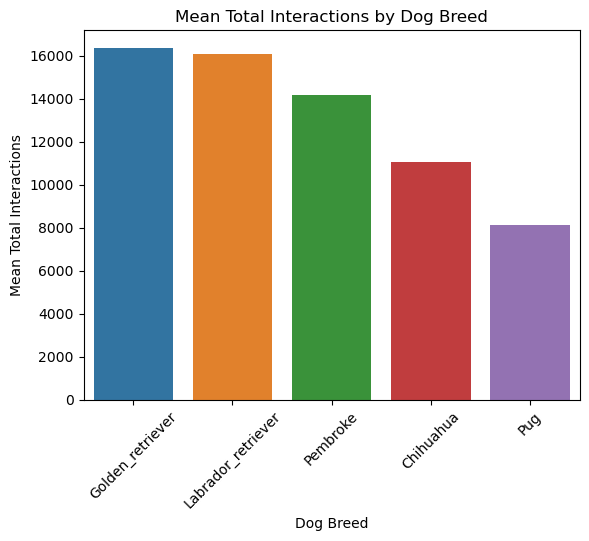

In [112]:
# Create a count plot
sns.barplot(x=interactions.index, y=interactions.values)
plt.xlabel('Dog Breed')
plt.ylabel('Mean Total Interactions')
plt.title('Mean Total Interactions by Dog Breed')
plt.xticks(rotation=45)
savefig('dog_breed_total_interactions')
plt.show()

#### Observations

1. Golden retrievers received the most interactions (likes and retweets) over the time period. Labrador retrievers were not far off<br>
2. Of dog types with atleast 50 tweets, Pugs had the least interactions.